# $\triangleright$ Our dataset :

$\bullet$ Αυτό το dataset περιέχει 76 χαρακτηριστικά,αλλά από αυτά θα χρησιμοποιήσουμε ένα subset των 14 χαρακτηριστικών.Γενικότερα η Cleveland βάση είναι από τις λίγες βάσεις πάνω στο ML.Το target field της αναφέρεται στην εμφάνιση καρδιακών προβλημάτων σε έναν ασθενή.Η βάση υπάρχει στο <a href="https://www.kaggle.com/ronitf/heart-disease-uci">Kaggle</a> και ονόμαζεται Heart Disease UCI.

$\bullet$ Tι χαρακτηριστικά θα χρησιμοποιήσουμε :

1. age 
2. sex 
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target


$\bullet$ Έχοντας όλα τα παραπάνω χαρακτηριστικά θα μελετήσουμε το συγκεκριμένο πρόβλημα classification δοκιμάζοντας διάφορους μεθόδους χρημοποιώντας βιβλιοθήκες από scikit-learn και tensorflow.

# $\triangleright$ Libraries we use :

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from feature_selector import FeatureSelector  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

# $\triangleright$ Read the dataset :

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# $\triangleright$ We find the Correlation. 

$\bullet$ Για να βρούμε το correlation μεταξύ των χαρακτηριστικών κατεβάζουμε μια βιβλιοθήκη από το github.Το αποτέλεσμα μας δείχνει ότι τα στοιχεία δεν έχουν τόσο σχέση μεταξύ τους συνεπώς τα κρατάμε όλα για να δημιουργήσουμε το μοντέλο μας.

Library: <a href="https://github.com/WillKoehrsen/feature-selector">Feature Selector</a>

10 features with a correlation magnitude greater than 0.10.

4 features with a correlation magnitude greater than 0.30.



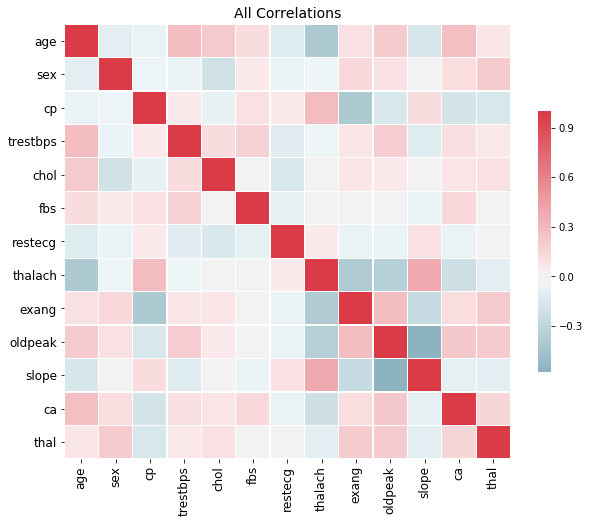

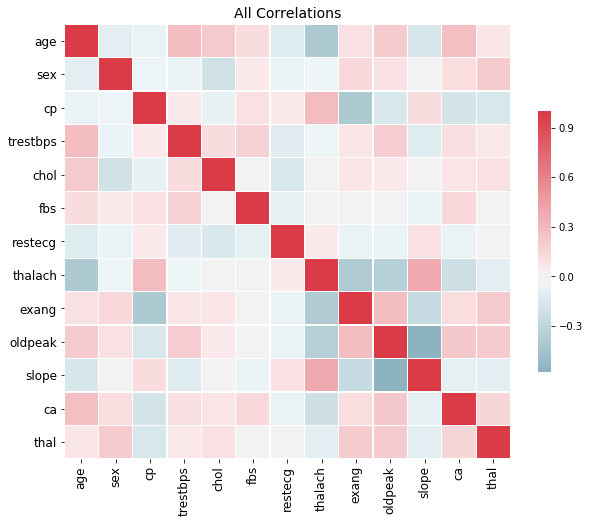

In [4]:
#Separate the data to features,target
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
features = pd.read_csv('heart.csv',usecols=columns)

target = pd.read_csv('heart.csv',usecols=["target"])

#Plot the cor
fs = FeatureSelector(data = features, labels = target)
fs.identify_collinear(correlation_threshold=0.10)
fs.plot_collinear(plot_all=True)

fs = FeatureSelector(data = features, labels = target)
fs.identify_collinear(correlation_threshold=0.30)
fs.plot_collinear(plot_all=True)

# $\triangleright$ Normalization:

$\bullet$ Στην συνέχεια κάνουμε normalization τα δεδομένα μας με την προοπτική οι αλγόριθμοι να συγκλίνουν πιο γρήγορα και να έχουμε και καλύτερη ακρίβεια.Για να το πετύχουμε αυτό χρησιμοποιούμε το MinMaxScaler της scikit-learn.

In [5]:
#Turn to array
features = np.array(features)
target = np.array(target)

#Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
features = scaler.fit_transform(features)
print(features)

[[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.16666667 1.         0.66666667 ... 0.         0.         0.66666667]
 [0.25       0.         0.33333333 ... 1.         0.         0.66666667]
 ...
 [0.8125     1.         0.         ... 0.5        0.5        1.        ]
 [0.58333333 1.         0.         ... 0.5        0.25       1.        ]
 [0.58333333 0.         0.33333333 ... 0.5        0.25       0.66666667]]


# $\triangleright$ Train-Test split

$\bullet$ Από όλα τα δεδομένα κάποια χρησιμοποιούμε για train και κάποια τα κρατάμε για το testing.

In [6]:
#Split the data in order to train and test the model
trainX,testX,trainY,testY = train_test_split(features,target,test_size=0.3)

#Turn to array
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)

# $\triangleright$ Decision Tree Classifier

$\bullet$ Το δέντρο αποφάσεως διαιρεί επαναληπτικά το dataset μας σε sub part χρησιμοποιώντας κάποιες αναγνωριστικές ευθείες.(Επαναληπτικά επειδή μπορεί να υπάρχουν δυο περιοχές της ίδιας κλάσης που διαιρούνται από άλλες).

<img src="images/div.png"/>

Πότε σταματάει ;

* Όταν έχει διαιρέσει σε κλάσσεις που είναι καθαρές(pure)(περιέχουν μονο χαρακτηριστικά μιας κλάσσης).
* Όταν συναντάμε συγκεκριμένες περιπτώσεις στα χαρακτηριστικά.

Για το διαχωρισμό των τμημάτων καθοριστικό ρόλο έχουν:

* Ιmpurity -> Βλέπουμε δείγματα μια κλάσης σε μια άλλη.
* Entropy -> Μετρική του impurity για κάποιο χαρακτηριστικό.(Υπάρχει και το gini impurity)

Βέβαια για να δημιουργήσουμε το δέντρο πρέπει να επιλέξουμε ποιο χαρακτηριστικό θα λάβουμε υπόψη κάθε φορα για τον διαχωρισμό.Το παραπάνω μας το καθορίζει το information gain που ορίζεται ως εξής :

 <strong>Information Gain (n) = Entropy(x) — ( weighted average * entropy(children for feature))</strong>

Συνεπώς επιλέγουμε κάθε φορα το χαρακτηριστικό με το μεγαλύτερο information gain για την δημιουργία του δέντρου.




# $\triangleright$ Train the Classifier

In [19]:
#Initialize and train the classifier
clf = DecisionTreeClassifier()
clf = clf.fit(trainX, trainY)

# $\triangleright$ Test the Classifier

In [20]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Scores: \n")
print(cross_val_score(clf,trainX,trainY, cv=10))
print()

#Test the classifier in order to get some metrics
yPred = clf.predict(testX)
accuracy = accuracy_score(testY,yPred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(confusion_matrix(testY,yPred))

Cross Validation Scores: 

[0.73913043 0.80952381 0.76190476 0.61904762 0.76190476 0.85714286
 0.76190476 0.76190476 0.66666667 0.61904762]

Accuracy:  0.7912087912087912
Confusion Matrix: 
[[28  9]
 [10 44]]


# $\triangleright$ Visualize the tree

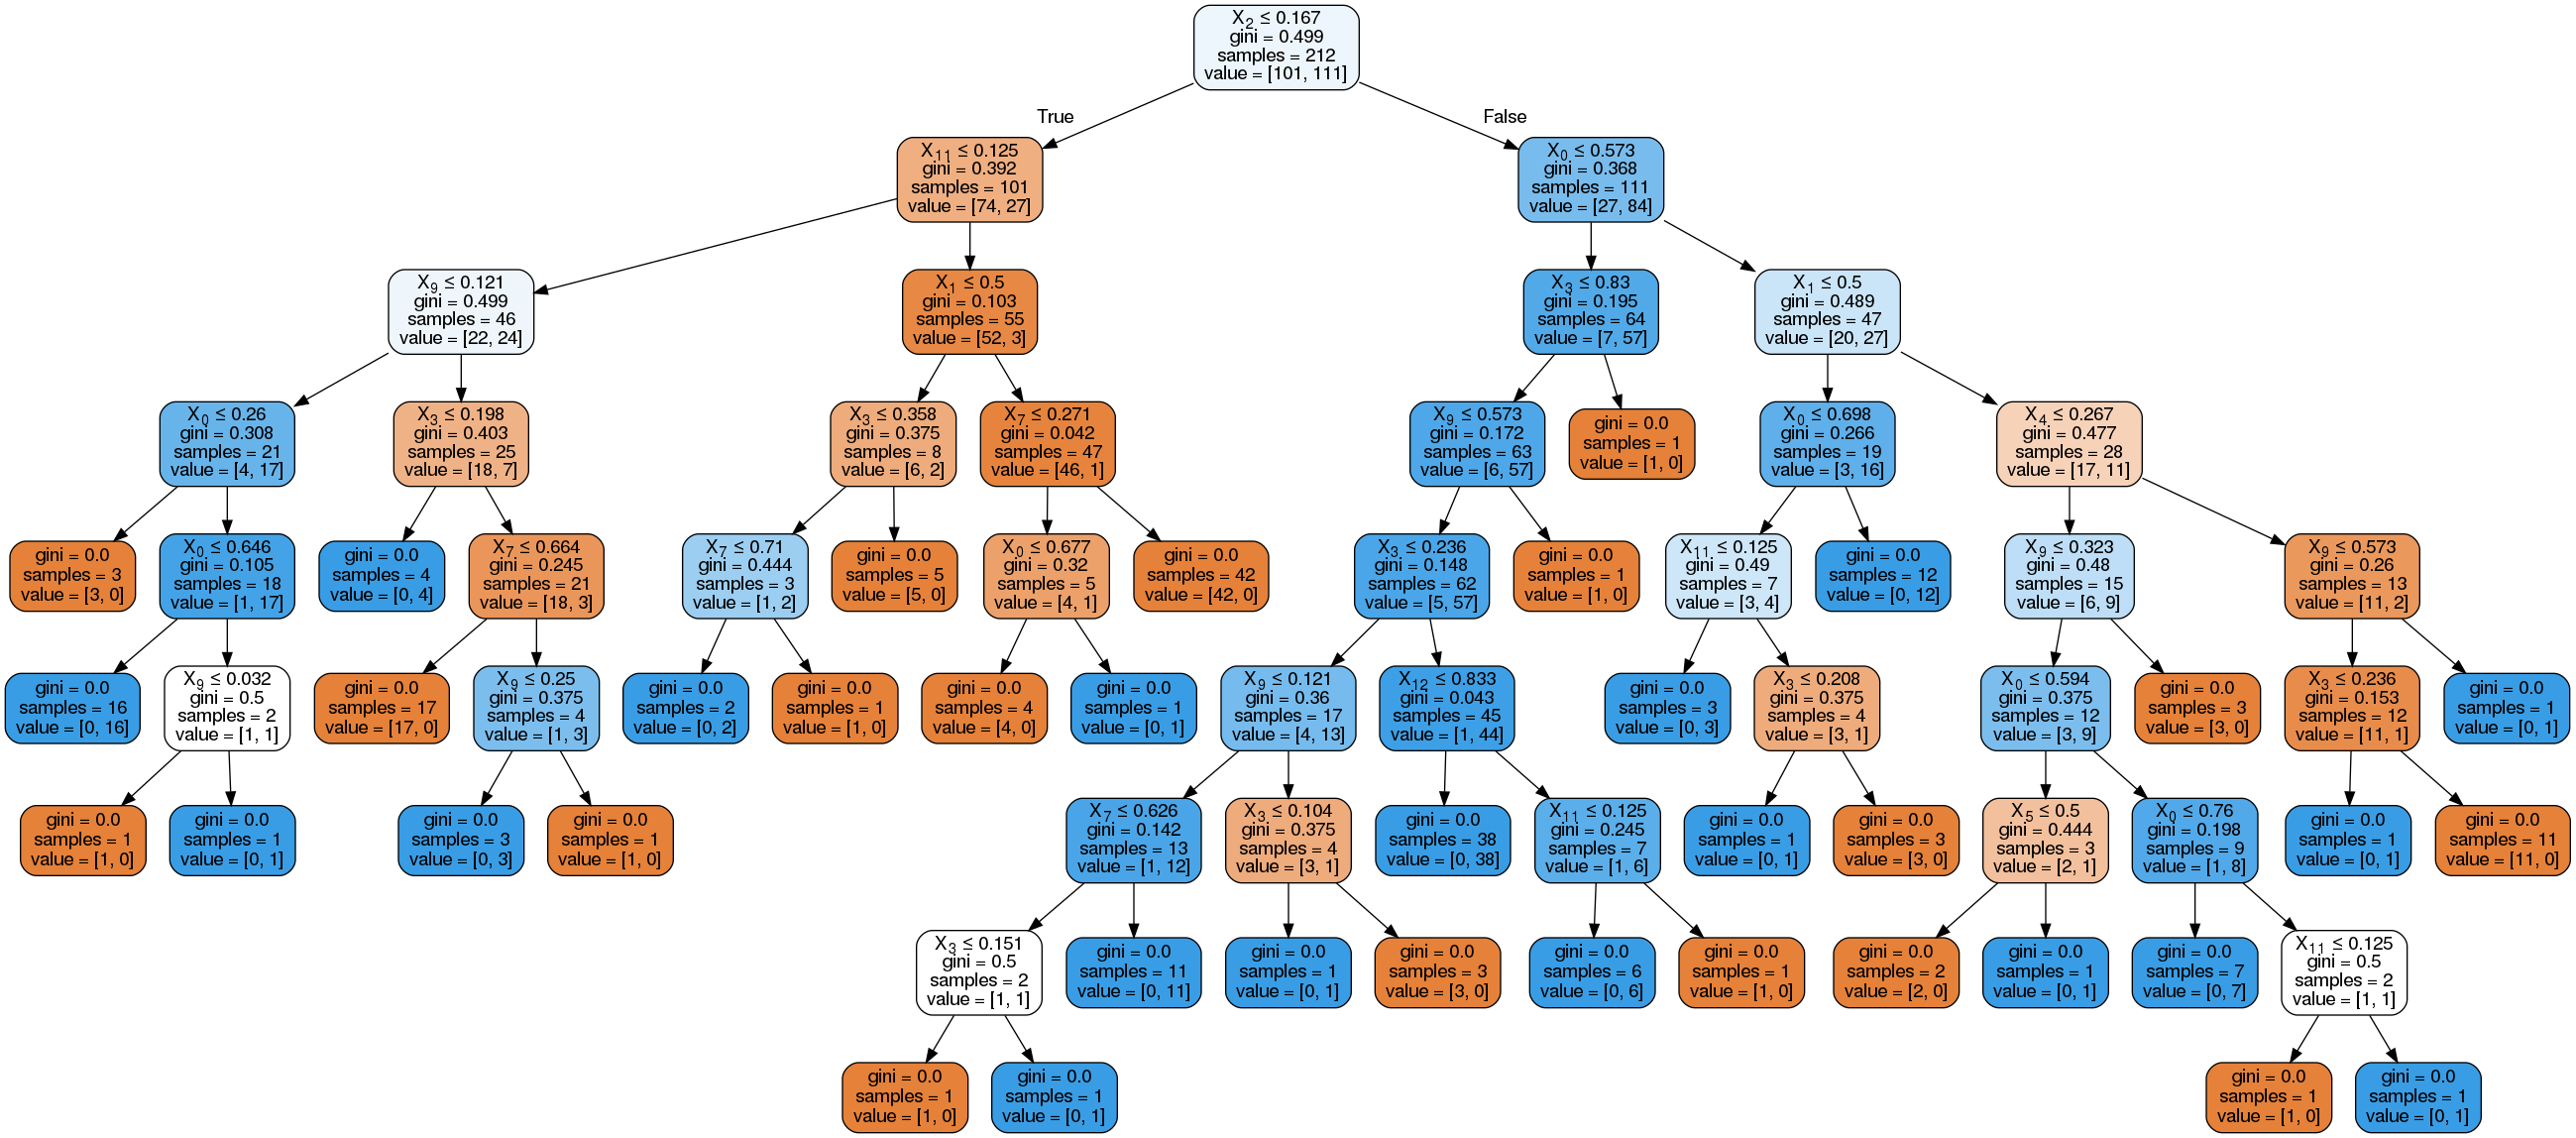

In [21]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# $\triangleright$ Random Forest Classifier

$\bullet$ Ο Random Forest Classifier ανήκει στην κατηγορία των ensemble αλγόριθμων.Αυτοί οι αλγόριθμοι συνδυάζουν περισσότερους απο έναν αλγόριθμους της ίδιας η διαφορετικής κατηγορίας για να κάνουν το classify.Συνεπώς ο αλγόριθμος μας δημιουργεί ένα set από δέντρα αποφάσεων από τυχαία subset του training set.Στην συνέχεια με βάση τα τυχαία δέντρα αποφασίζει την τελική κλάσση για το εκάστοτε test.

$\bullet$ Ας υποθέσουμε ότι μας δίνουν σαν training set:[X1,X2,X3,X4] με τα αντίστοιχα labels [L1,L2,L3,L4].Ο Random Forrest δημιουργεί 3 δέντρα αποφάσεων από το input που του δίνουμε:

* [X1, X2, X3]
* [X1, X2, X4]
* [X2, X3, X4]

$\bullet$ Και οι προβλέψεις του μοντέλου βασίζονται σε αυτά τα δέντρα αποφάσεων.

# $\triangleright$ Train the Classifier

In [24]:
#Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=len(features), max_depth=None)
clf.fit(trainX,trainY.flatten())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=303, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# $\triangleright$ Test the Classifier

In [31]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Scores: \n")
print(cross_val_score(clf,trainX,trainY.flatten(), cv=10))
print()

#Test the classifier in order to get some metrics
yPred = clf.predict(testX)
accuracy = accuracy_score(testY,yPred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(confusion_matrix(testY,yPred))

Cross Validation Scores: 

[0.86956522 0.85714286 0.80952381 0.85714286 0.76190476 0.76190476
 0.80952381 0.85714286 0.61904762 0.80952381]

Accuracy:  0.8461538461538461
Confusion Matrix: 
[[31  6]
 [ 8 46]]


# $\triangleright$ Visualize some of the trees that random forrest generates

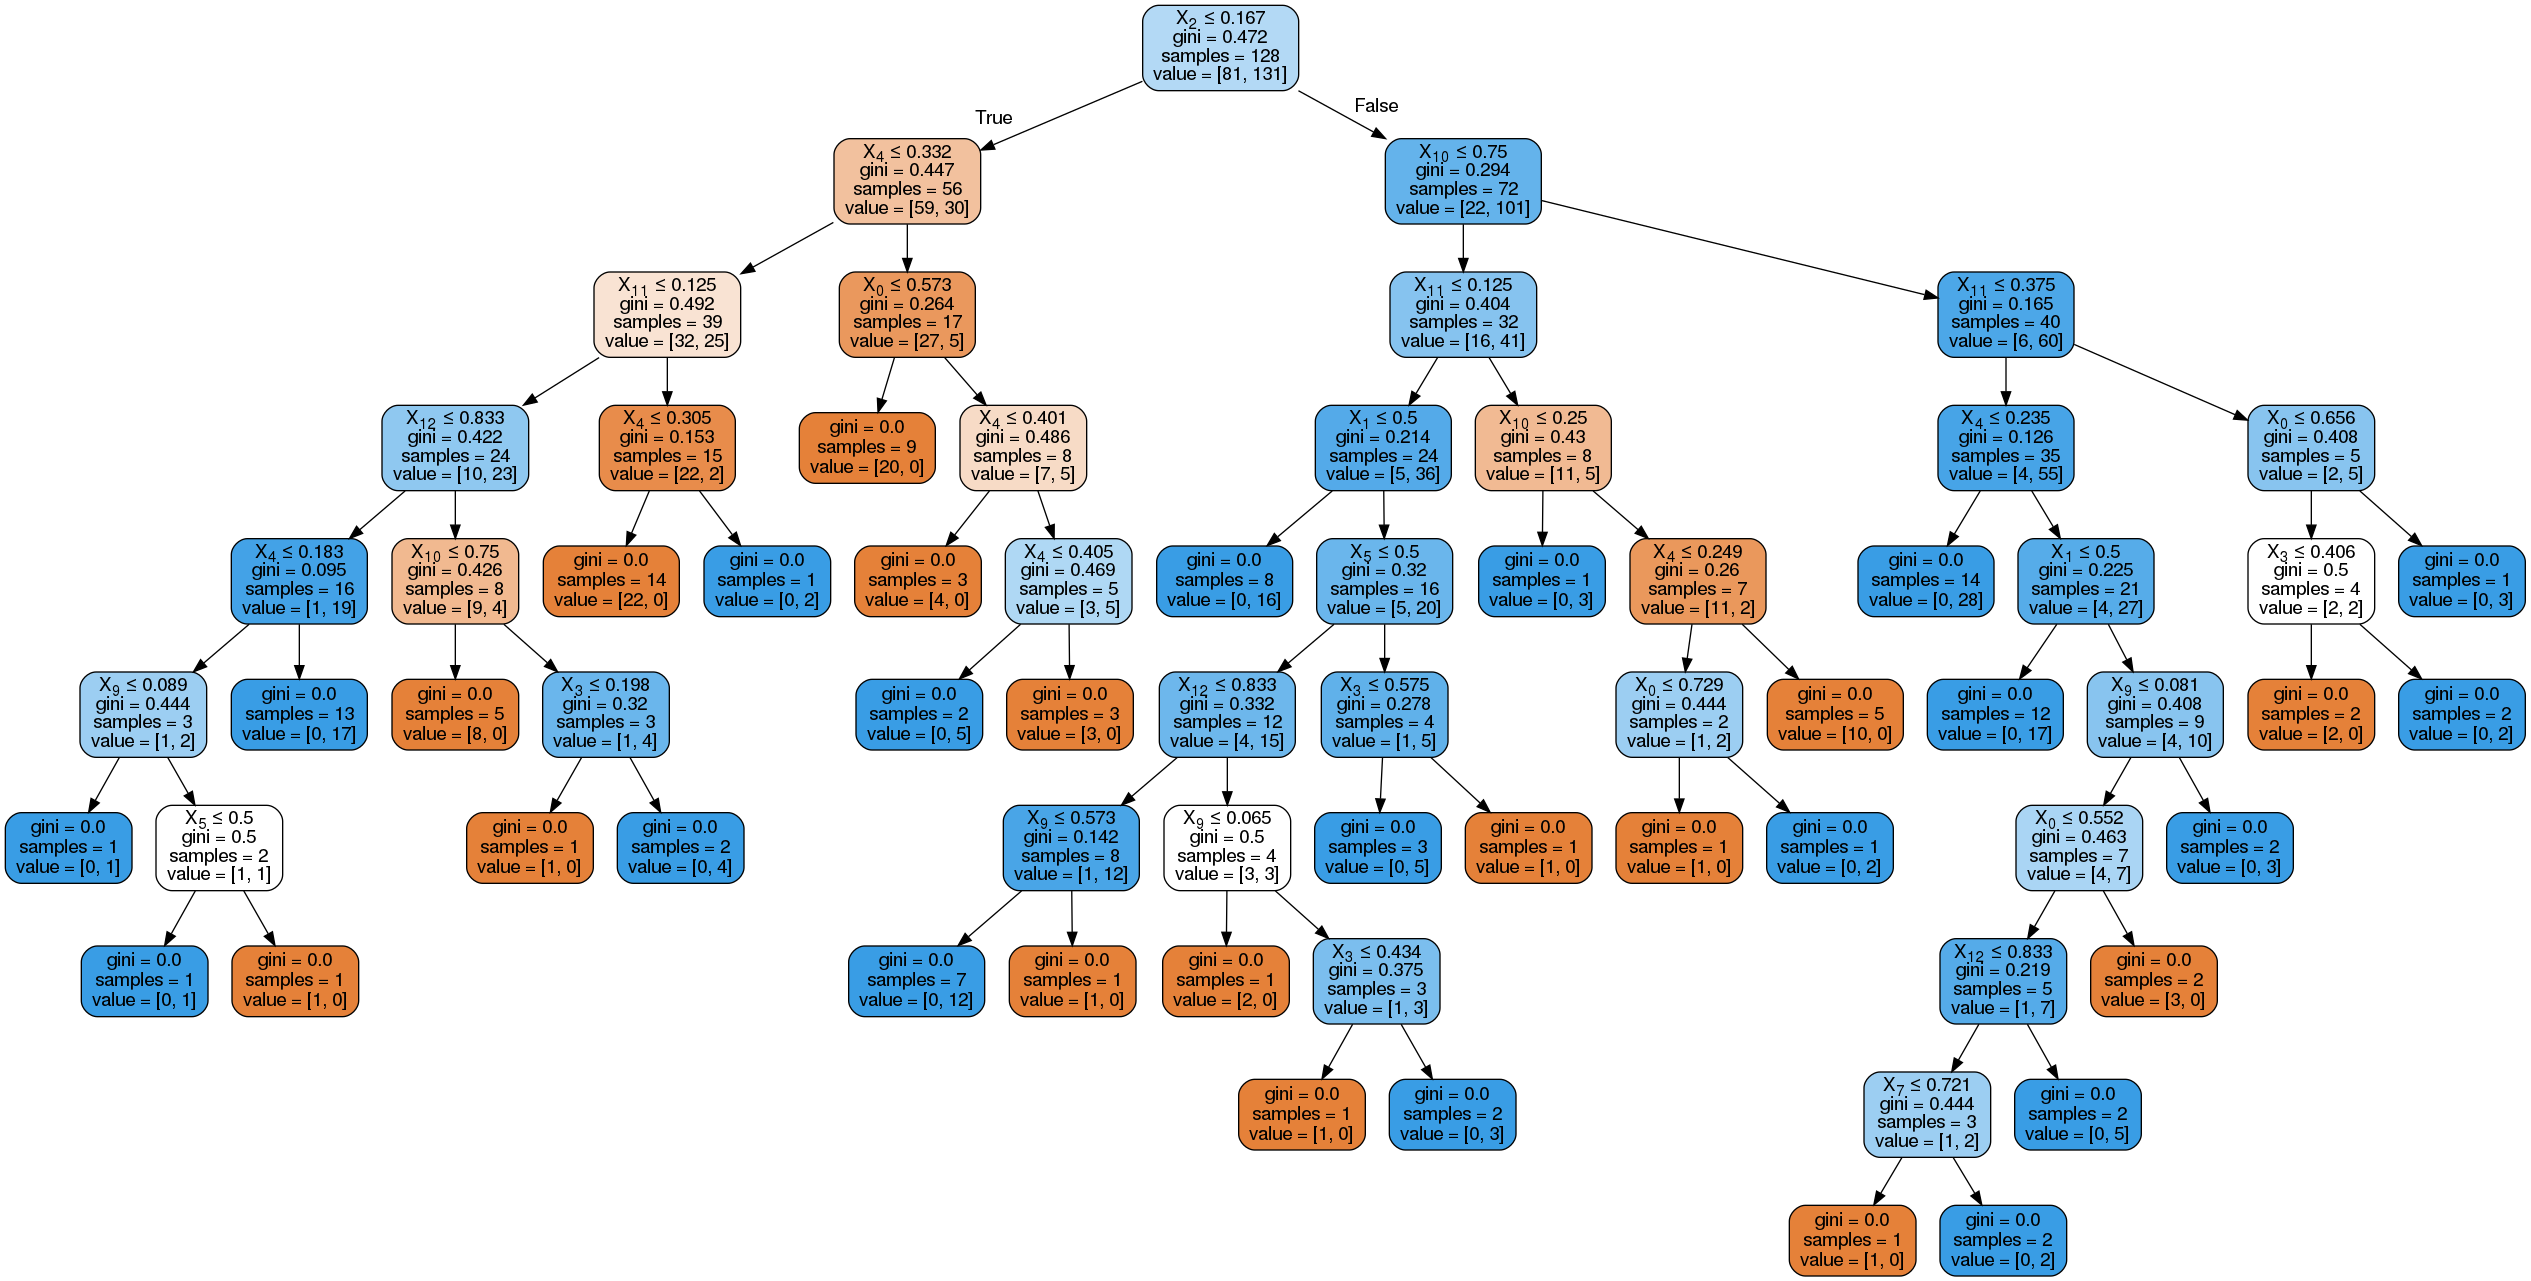

In [28]:
estimator = clf.estimators_[0]
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

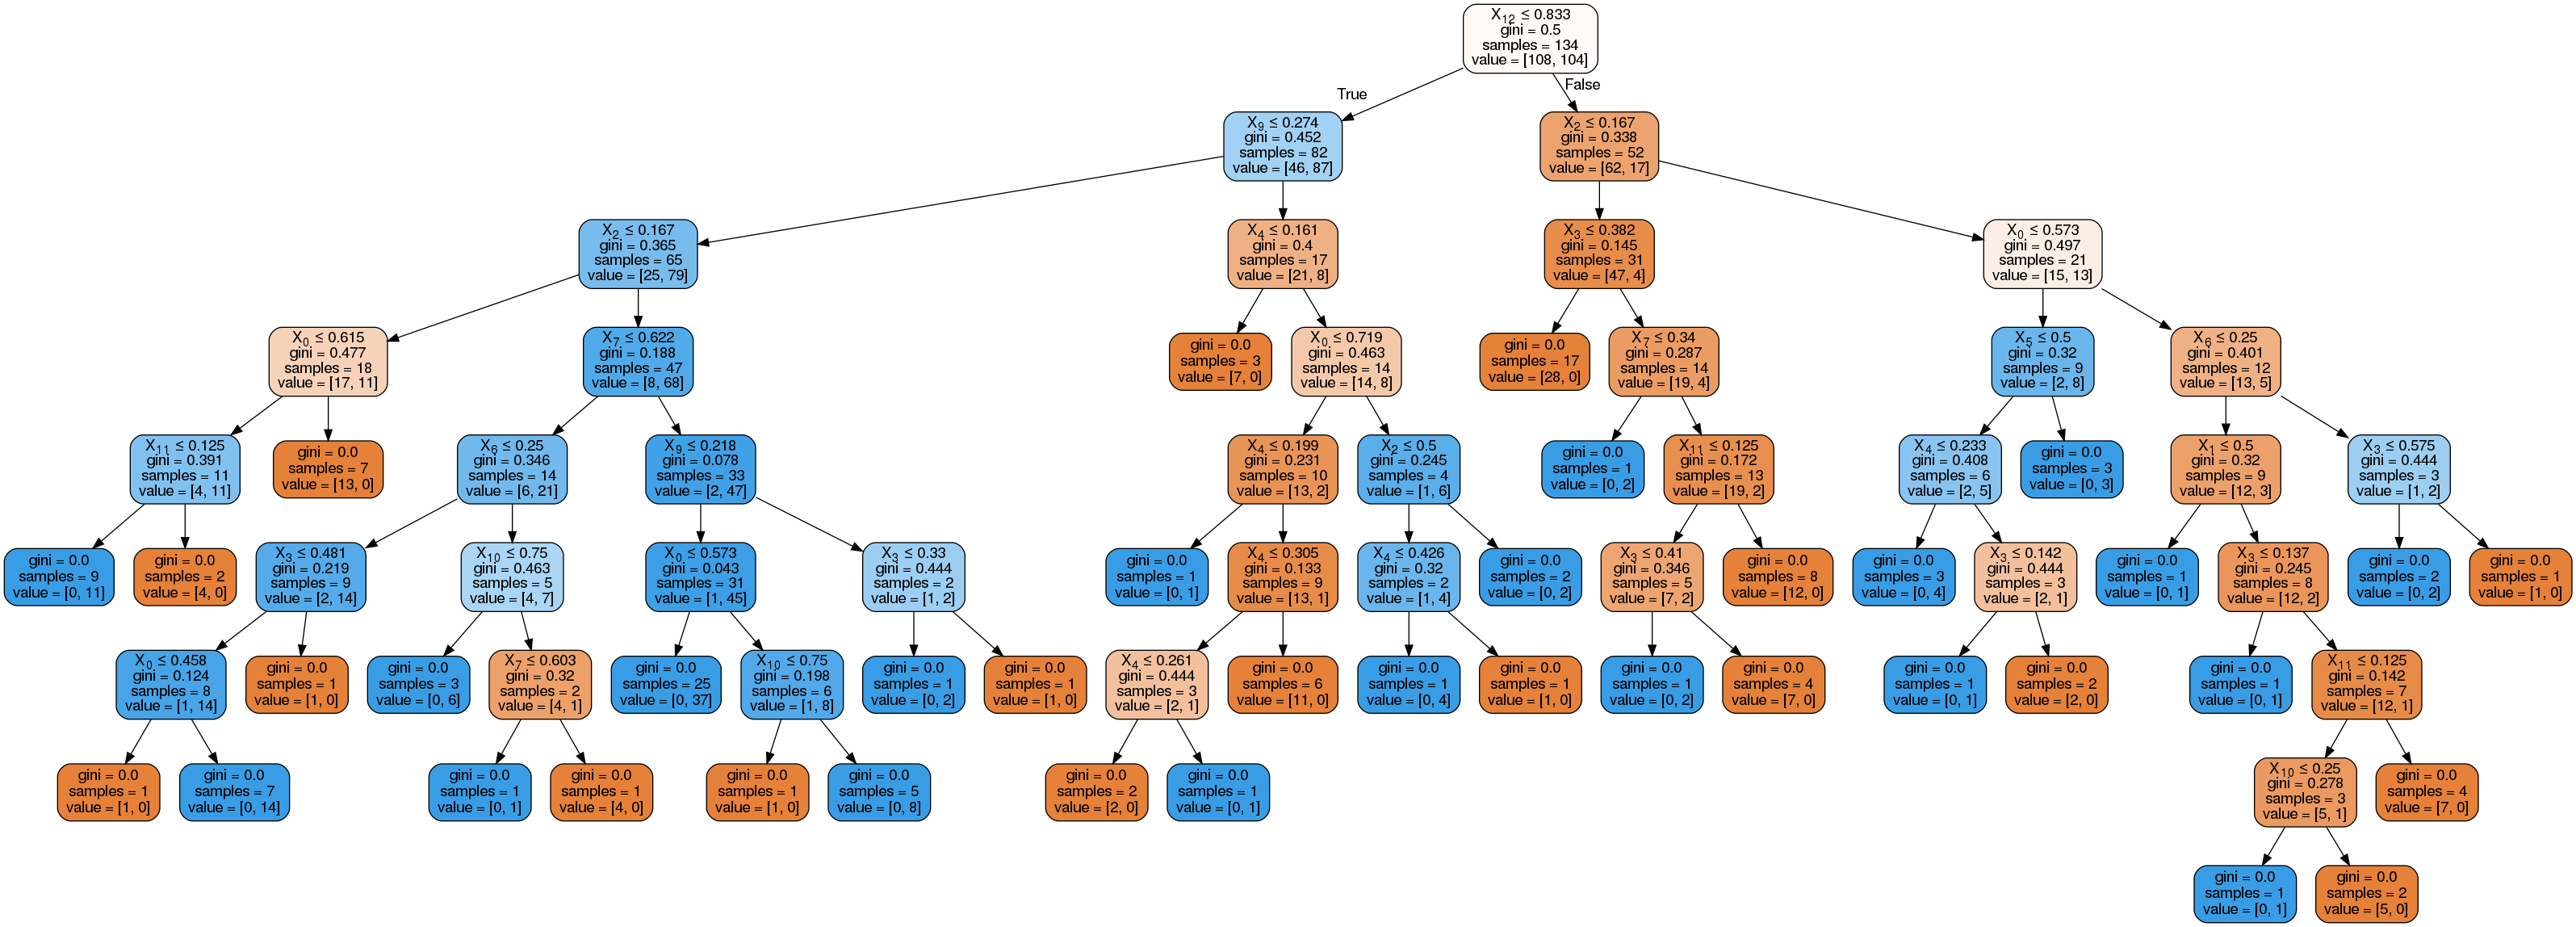

In [29]:
estimator = clf.estimators_[3]
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# $\triangleright$ K-Nearest Neighbors Classifier

$\bullet$ O KNN αποτελεί εναν ακόμη απλό σχετικά αλγόριθμο για supervised learning ,ο οποίος δεν έχει κάποιο training step μιας και εκμεταλλεύεται όλα τα data points που του δίνουμε για το prediction.Αν και δεν θέλει train η φάση της πρόβλεψης κοστίζει αφού χρησιμοποιούμε όλο το dataset που μας δίνεται.

$\bullet$ Ο ΚΝΝ παίρνει τους Κ κοντινότερους γείτονες για να αποφασίσει σε ποια κλάση ανήκει το καινούργιο data point χρησιμοποιώντας την μέθοδο του feature similarity.Η τιμή του K καθορίζεται από εμάς και το μόνο που μας μένει είναι να δοκιμάσουμε διάφορες τιμές για να βρούμε την κατάλληλη που ταιριάζει στην περίπτωση μας.

Πώς λειτουργεί ο KNN ; 

* Επιλέγουμε την τιμή του Κ.
* Βρίσκουμε την απόσταση του νέου μας σημείου από κάθε training instance.
* Βρίσκουμε τους Κ πλησιέστερους γείτονες του νέου αυτού σημείου.
* Το σημείο θα ανήκει στην κλάσση που έχουν οι περισσότεροι Κ πλησιέστεροι γείτονες του.

Την απόσταση μπορούμε να την υπολογίσουμε με τα παρακάτω :

* Euclidean distance
* Manhattan distance
* Hamming Distance
* Minkowski Distance


# $\triangleright$ Testing for different K values

Best K: 100  Accuracy:  0.9010989010989011  Best Distance:  hamming


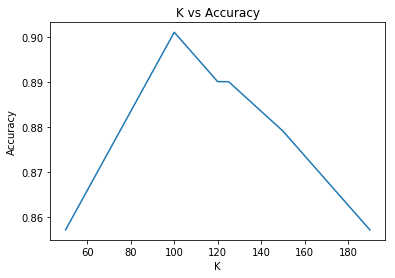

In [78]:
import sys
K = [50,100,120,125,150,190]
distance=['euclidean','manhattan','hamming','minkowski']

bestK=0
bestDistance=""
bestAcc=0

acc = []
iqq=0
for kk in K:
    tempDistance=""
    tempAcc=0
    
    for dist in distance:
        neigh = KNeighborsClassifier(algorithm='auto',n_neighbors=(kk),metric=dist)
        neigh.fit(trainX,trainY.flatten())

        #Test the classifier in order to get some metrics
        yPred = neigh.predict(testX)
        acc_sc = accuracy_score(testY,yPred)
        
        #Get the best distance for a specific K
        if(acc_sc > tempAcc):
            tempDistance=dist
            tempAcc=acc_sc
    
    #Check if the best K and distance has changed
    if(tempAcc > bestAcc):
        bestK=kk
        bestDistance=tempDistance
        bestAcc=tempAcc
    acc.append(tempAcc)

plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(K,acc)

print("Best K:",bestK," Accuracy: ",bestAcc," Best Distance: ",bestDistance)

$\bullet$ Επομένως δοκιμάζοντας διάφορες τιμές για το Κ καταλήγουμε ότι το κατάλληλο για εμάς είναι K = 120 διοτί μετά από αυτό το accuracy μας πέφτει.

# $\triangleright$ KNN for K 100 and Distane hamming

In [81]:
neigh = KNeighborsClassifier(algorithm='auto',n_neighbors=(100),metric="hamming")
neigh.fit(trainX,trainY.flatten())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

# $\triangleright$ Test the Classifier

In [82]:
#Test the classifier in order to get some metrics
yPred = neigh.predict(testX)
accuracy = accuracy_score(testY,yPred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(confusion_matrix(testY,yPred))

Accuracy:  0.9010989010989011
Confusion Matrix: 
[[30  7]
 [ 2 52]]
